In [125]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [126]:
columns = ['State', 'Obesity', 'Party', 'Acronym']
data_2000 = pd.read_csv('./assets/Obesity Election 2000.csv', header=None)
data_2004 = pd.read_csv('./assets/Obesity Election 2004.csv', header=None)
data_2000.columns = columns
data_2004.columns = columns

In [127]:
# Make percentages to floats. E.g 27.7 -> 0.277
try:
    data_2000['Obesity'] = data_2000['Obesity'].str.rstrip('%').astype('float') / 100
except AttributeError:
    print("Error - But for now I don't care about")

try:
    data_2004['Obesity'] = data_2004['Obesity'].str.rstrip('%').astype('float') / 100
except AttributeError:
    print("Error - But for now I don't care about")
    
data_2004['Party'] = data_2004['Party'].map({'R': 1, 'D': 0})
data_2000['Party'] = data_2000['Party'].map({'R': 1, 'D': 0})

In [128]:
def generate_error_plot(err, label=""):
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(err) + 1), err, marker='o', linestyle='-', color='b')
    plt.title('Error Rate vs. Number of Neighbors (k). - ' + label)
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Error Rate')
    plt.grid(True)
    plt.show()

In [129]:
def knn_cross_validation(train_set, test_set):
    train_size = train_set["Obesity"].size # Size of features
    test_size = test_set["Obesity"].size
    
    err = []
    for k in range(1, train_size):
        err_temp = []
        knn = KNeighborsClassifier(n_neighbors=k)
        loo = LeaveOneOut()
        for train_split, test_split in loo.split(train_set):
            train_x = train_set["Obesity"].iloc[train_split].values
            train_y = train_set["Party"].iloc[train_split].values
            test_x = train_set["Obesity"].iloc[test_split].values
            test_y = train_set["Party"].iloc[test_split].values
    
            knn.fit(train_x.reshape(-1, 1), train_y)
            prediction = knn.predict(test_x.reshape(-1, 1))
    
            err_temp.append(np.mean([x != y for x, y in zip(prediction, test_y)]))
        err.append(np.mean(err_temp))
    return err

In [130]:
def knn_predict(train_set, test_set, k):
    knn = KNeighborsClassifier(n_neighbors=best_k[-1]) # it shouldn't matter which k is chosen, as long as it's the smallest error rate. But we choose the last one for simplicity.
    
    knn.fit(train_set["Obesity"].values.reshape(-1, 1), train_set["Party"].values)
    
    prediction = knn.predict(test_set["Obesity"].values.reshape(-1, 1))
    prediction_error = np.mean([x != y for x, y in zip(prediction, test_set["Party"].values)])
    return prediction_error

# Task 1
Consider predicting the results of US presidential election using the obesity index (for each state) as a single input variable. The obesity index is the percentage of adult population that has BMI index greater than 30. You can find this obesity index for each US state from the public domain sources. This problem can be formalized as a binary classification problem, because there are only two voting outcomes (Republican or Democrat). That is, each data sample (x,y) represents a state, where single input x is the obesity index (for that state) and y is a binary label denoting the presidential election voting result. Historical data for this problem can be found from public-domain sources. For example, see US obesity rates and election results at: http://en.wikipedia.org/wiki/Obesity in the United States http://en.wikipedia.org/wiki/United States_presidential_election, 2004
The results of 2004 presidential election are used as the training data for estimating a binary classifier. The results of 2000 elections are used as test data. Estimate a k-nearest neighbor classifier to predict the election results (for each state) using the obesity index. An optimal k-value is selected using leave-one-out cross-validation on the training data. Then use this k-nearest neighbor model to predict the results of 2000 elections.
Clearly present all modeling results, including resampling error, optimal k-value and test error. Also, briefly discuss your results. Your discussion may include: the quality of your predictive model, comparison of the resampling error and test error, and critique of modeling assumptions.

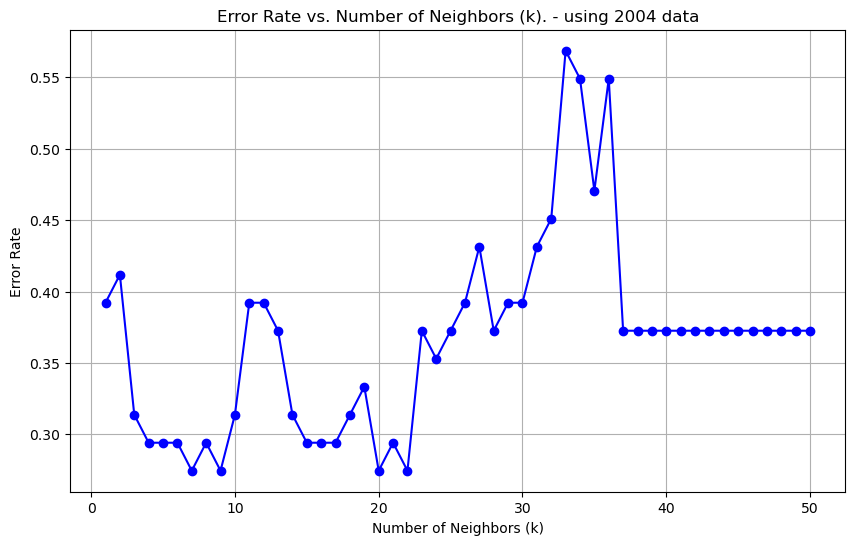

In [131]:
train_set = data_2004
test_set = data_2000

err = knn_cross_validation(train_set, test_set)
generate_error_plot(err, label="using 2004 data")

In [132]:
min_err = min(err)
best_k = [i+1 for i, j in enumerate(err) if j == min_err]
print("Best k-values are {0} with an error of {1}".format(best_k, min_err))

Best k-values are [7, 9, 20, 22] with an error of 0.27450980392156865


In [133]:
# It shouldn't matter which k is chosen, as long as it's the smallest error rate. But we choose the last one for simplicity.
# Predict the party of the 2000 state using the KNN model
prediction_error = knn_predict(train_set, test_set, best_k[-1])

print("Prediction error: {0}".format(prediction_error))
print("This means that the KNN model with {0} neighbors has an error rate of {1}% on the 2000 test data.".format(best_k[-1], round(prediction_error*100, 1)))

Prediction error: 0.5490196078431373
This means that the KNN model with 22 neighbors has an error rate of 54.9% on the 2000 test data.


## Task 2
Repeat Problem 2.7 using election results for year 2000 as training data, and election results for year 2004 as test

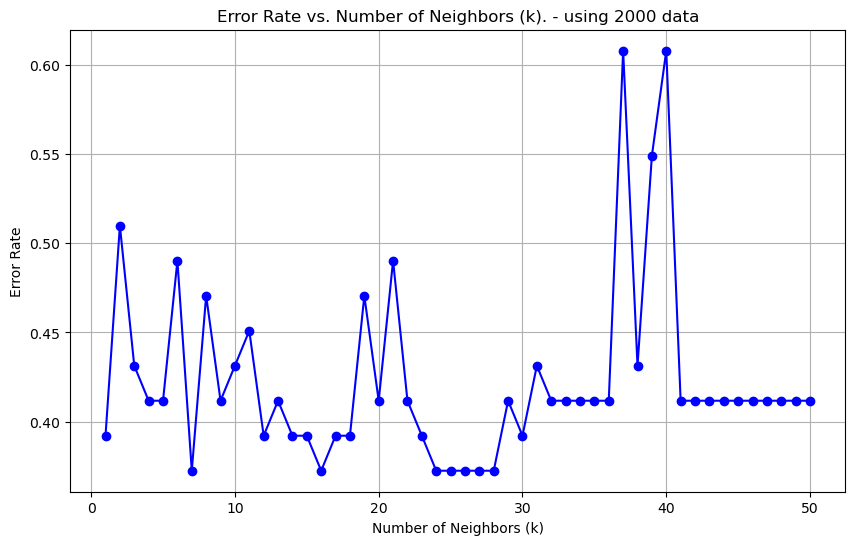

Best k-values are [7, 16, 24, 25, 26, 27, 28] with an error of 0.37254901960784315
Prediction error: 0.35294117647058826
This means that the KNN model with 28 neighbors has an error rate of 35.3% on the 2004 test data.


In [134]:
train_set = data_2000
test_set = data_2004

err = knn_cross_validation(train_set, test_set)
generate_error_plot(err, label="using 2000 data")

min_err = min(err)
best_k = [i+1 for i, j in enumerate(err) if j == min_err]
print("Best k-values are {0} with an error of {1}".format(best_k, min_err))

prediction_error = knn_predict(train_set, test_set, best_k[-1])

print("Prediction error: {0}".format(prediction_error))
print("This means that the KNN model with {0} neighbors has an error rate of {1}% on the 2004 test data.".format(best_k[-1], round(prediction_error*100, 1)))

## Task 3a


In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [136]:
def generate_data(n=10):
    x = np.random.uniform(0, 1, n)
    noise = np.random.normal(0, 0.5, n)
    y = x**2 + 0.1 * x + noise
    return pd.DataFrame({'x': x, 'y': y})

In [137]:
def algebraic_model(x, m):
    w = []
    for xi in x:
        w = [x ** i for i in range(1, m + 1)]
    return pd.DataFrame(w)

def trigonometric_model(x, m):
    w = []
    for xi in x:
        w = [ np.cos(2 * np.pi * x * i) for i in range(1,  m+1)]
    return pd.DataFrame(w)

In [138]:
def schwartz_criterion(p, n):
    return 1 + p * ((1 - p) ** -1) * np.log(n)

In [139]:
def linear_regression_model(df: pd.DataFrame, estimations: pd.DataFrame):
    data_size = df['x'].size
    transpose = estimations.transpose()
    schwartz = []
    for m in range(1, data_size - 1):
        lr = LinearRegression()
        lr.fit(transpose.iloc[:, 0:m].values.tolist(), df['y'])
        prediction = lr.predict(transpose.iloc[:, 0:m].values.tolist())
        mse = mean_squared_error(df['y'], prediction)
        schwartz.append(schwartz_criterion(m / data_size, data_size) * mse)
    return  schwartz

In [140]:
data = generate_data()
data_size = data.x.size
trigonometric_estimations = trigonometric_model(data.x, data_size)
algebraic_estimations = algebraic_model(data.x, data_size)


schwartz_trigonometric = linear_regression_model(data, trigonometric_estimations)
schwartz_algebraic = linear_regression_model(data, algebraic_estimations)

min_m_trigonometric = np.argmin(schwartz_trigonometric)
min_m_algebraic = np.argmin(schwartz_algebraic)

fav = ""
if schwartz_trigonometric[min_m_trigonometric] < schwartz_algebraic[min_m_algebraic]:
    fav = "Trigonometric"
elif schwartz_trigonometric[min_m_trigonometric] == schwartz_algebraic[min_m_algebraic]:
    fav = "Both models are equally good"
else:
    fav = "Algebraic"

print("--------------------------------")
print("Schwartz criterion for trigonometric model:")
print("Best m: " + str(min_m_trigonometric+1))
print("Estimation of: " + str(schwartz_trigonometric[min_m_trigonometric]))
print("--------------------------------")
print("Schwartz criterion for algebraic model:")
print("Best m: " + str(min_m_algebraic+1))
print("Estimation of: " + str(schwartz_algebraic[min_m_algebraic]))
print("--------------------------------")
print("Result:" + fav + " model is favored based on Schwartz criterion.")

--------------------------------
Schwartz criterion for trigonometric model:
Best m: 7
Estimation of: 0.07359415635640627
--------------------------------
Schwartz criterion for algebraic model:
Best m: 8
Estimation of: 0.09095773363545893
--------------------------------
Result:
Trigonometric model is favored based on Schwartz criterion.


## Aufgabe 1
- 2004 test data and 2000 as training
- Table to present results --> into the report
- KNeighborsClassifier and LeaveOneOut
- Why use Obesity to predict the result? --> 
---
## Aufgabe 3
- Doing Regession
- Cosine fucntion to do prediction
- Complexity parameter - Use schwartz criterion from function 
- Provide similar table to present results. Lek 3 P.35 --> into the report
- Table for task a and table for task b.

## Aufgabe 4
- Double resampling 
- Provide best k values
